In [1]:
import numpy as np 
import pandas as pd

### Read the csv file and start the index with 1 and name the index

In [2]:
videogames=pd.read_csv("vgsales.csv")
videogames.index +=1 
videogames.index.name ='S.no'
videogames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
S.no,,,,,,,,,,,
1,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
videogames.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
S.no,,,,,,,,,,,
16594,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16595,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16596,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16597,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16598,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [4]:
videogames.dtypes
# videogames.size

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [65]:
videogames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 1 to 16598
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null int64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Convert the year column float to int 

In [5]:
videogames.dropna(inplace=True)
videogames.Year = videogames.Year.astype('int64') 
videogames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
S.no,,,,,,,,,,,
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Performing basic calculations in pandas

In [6]:
#maximum sales in North America
videogames.max()

Rank                                   16600
Name            ¡Shin Chan Flipa en colores!
Platform                                XOne
Year                                    2020
Genre                               Strategy
Publisher                       responDESIGN
NA_Sales                               41.49
EU_Sales                               29.02
JP_Sales                               10.22
Other_Sales                            10.57
Global_Sales                           82.74
dtype: object

In [7]:
#Total sales in North America
Total_sales_NA =videogames['NA_Sales'].sum()
print('Total_sales_NA = '+str(Total_sales_NA))

Total_sales_NA = 4327.650000000001


In [8]:
import matplotlib.pyplot as plt

In [61]:
byyear=videogames.groupby(['Year']).sum()
byyear=byyear.drop(columns=['Rank'])
byyear.head()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980,10.59,0.67,0.00,0.12,11.38
1981,33.40,1.96,0.00,0.32,35.77
1982,26.92,1.65,0.00,0.31,28.86
1983,7.76,0.80,8.10,0.14,16.79
1984,33.28,2.10,14.27,0.70,50.36


### Total sales by year and region

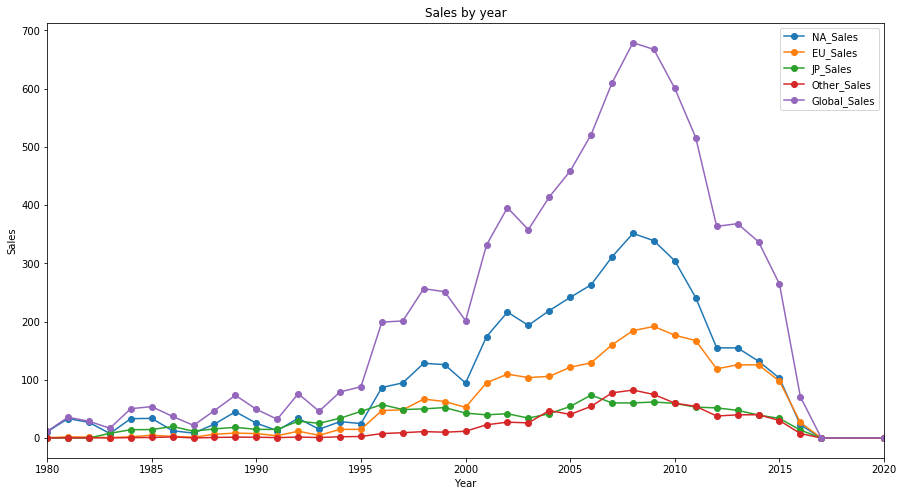

In [10]:
from matplotlib import rcParams
rcParams['figure.figsize']=15,8
byyear.plot.line(marker='o')
plt.title('Sales by year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.style.context('gg plot')
plt.show()

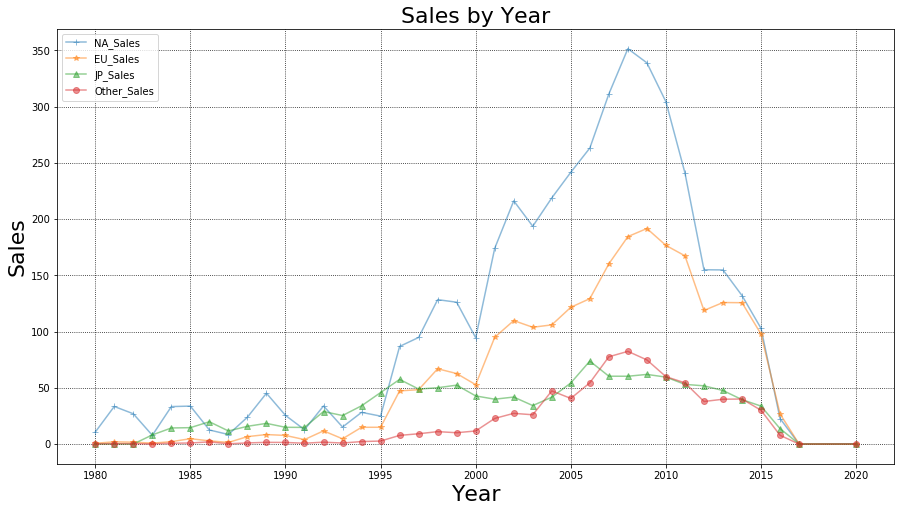

In [11]:
plt.figure(figsize=(15,8))
plt.plot(byyear.NA_Sales,label='NA_Sales',marker='+',alpha=0.5)
plt.plot(byyear.EU_Sales,label='EU_Sales',marker='*',alpha=0.5)
plt.plot(byyear.JP_Sales,label='JP_Sales',marker='^',alpha=0.5)
plt.plot(byyear.Other_Sales,label='Other_Sales',marker='o',alpha=0.5)
plt.title('Sales by Year', size=22)
plt.xlabel('Year',size=22)
plt.ylabel('Sales',size=22)
plt.legend(loc=2)
plt.grid(True, color='k',linestyle=':')
plt.style.context('gg plot')
plt.show()

<Figure size 1080x576 with 0 Axes>

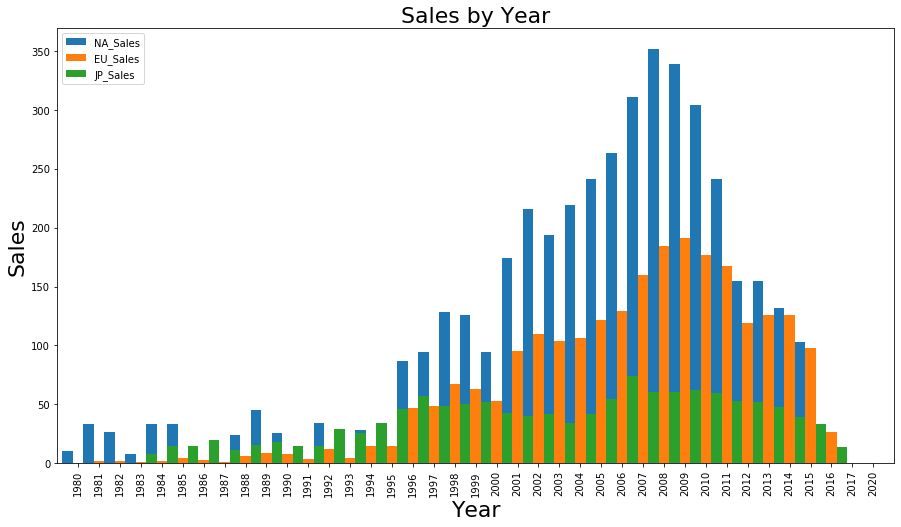

In [62]:
plt.figure(figsize=(15,8))
byyear[['NA_Sales','EU_Sales','JP_Sales']].plot(kind='bar',width=1.5, align='center')
plt.title('Sales by Year', size=22)
plt.xlabel('Year',size=22)
plt.ylabel('Sales',size=22)
plt.legend(loc=2)
plt.show()

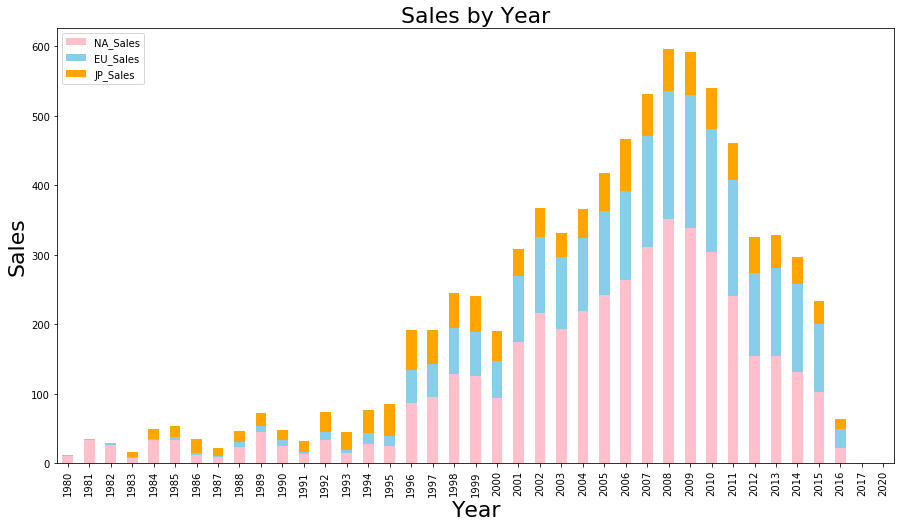

In [90]:
byyear.reset_index().plot(x='Year', y=['NA_Sales', 'EU_Sales', 'JP_Sales'], kind='bar',color=['pink','skyblue','orange'], stacked=True)
plt.title('Sales by Year', size=22)
plt.xlabel('Year',size=22)
plt.ylabel('Sales',size=22)
plt.legend(loc=2)
plt.show()

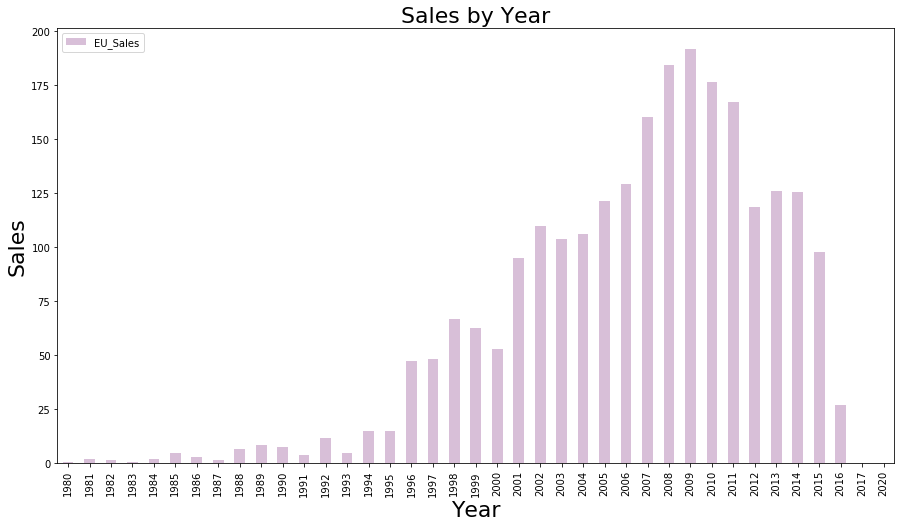

In [112]:
byyear.reset_index().plot(x='Year', y='EU_Sales', kind='bar',color='thistle')
plt.title('Sales by Year', size=22)
plt.xlabel('Year',size=22)
plt.ylabel('Sales',size=22)
plt.legend(loc=2)
plt.show()

### Global sales vs Genre

In [77]:
bygenre=videogames.groupby(['Genre']).sum()
bygenre=bygenre.drop(columns=['Rank','Year'])
bygenre.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.65,184.92,1722.84
Adventure,101.93,63.74,51.99,16.70,234.59
Fighting,220.74,100.00,87.15,36.19,444.05
Misc,396.92,211.77,106.67,73.92,789.87
Platform,445.99,200.65,130.65,51.51,829.13


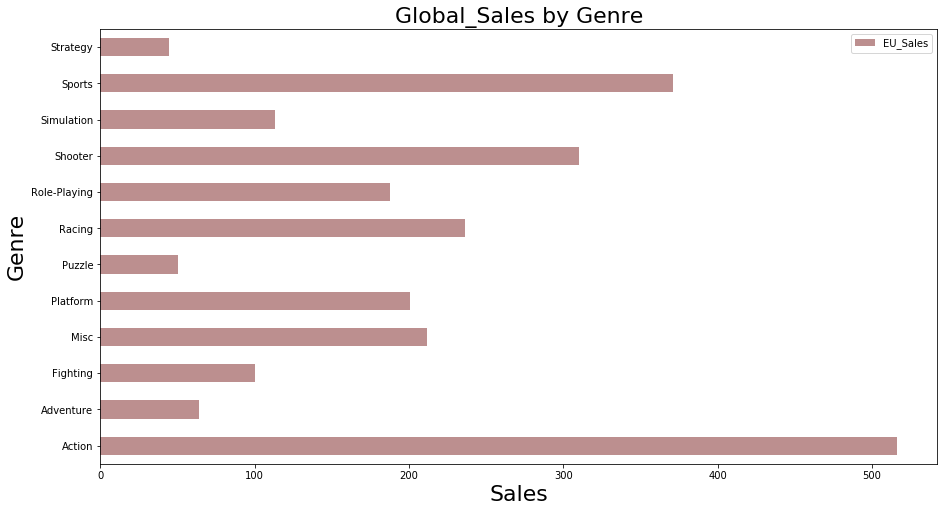

In [121]:
bygenre.reset_index().plot(x='Genre', y='EU_Sales',kind='barh',color='rosybrown')
plt.title('Global_Sales by Genre', size=22)
plt.xlabel('Sales',size=22)
plt.ylabel('Genre',size=22)
plt.legend(loc=1)
plt.show()

In [125]:
GenrePlatform=pd.crosstab(videogames['Genre'],videogames['Platform'])
GenrePlatform

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,55,0,180,3,335,6,162,98,3,0,...,3,0,12,0,0,230,63,318,152,68
Adventure,1,1,36,11,238,5,36,20,2,0,...,26,0,4,1,0,83,3,47,26,12
Fighting,1,0,14,12,36,0,23,42,5,0,...,31,0,25,0,0,41,5,65,44,7
Misc,5,0,53,0,389,8,86,35,1,0,...,15,2,17,0,0,272,21,122,45,15
Platform,9,0,28,2,89,18,139,73,7,1,...,5,1,26,0,0,57,16,24,49,4
Puzzle,8,1,19,0,236,15,39,12,0,0,...,5,0,13,0,0,54,4,6,7,0
Racing,4,0,10,6,66,2,64,60,1,0,...,8,1,9,0,0,92,3,102,122,19
Role-Playing,0,0,85,4,196,21,73,25,3,0,...,17,1,50,0,4,35,6,75,23,13
Shooter,22,0,6,3,42,1,40,48,1,0,...,22,0,10,1,0,61,10,197,124,33


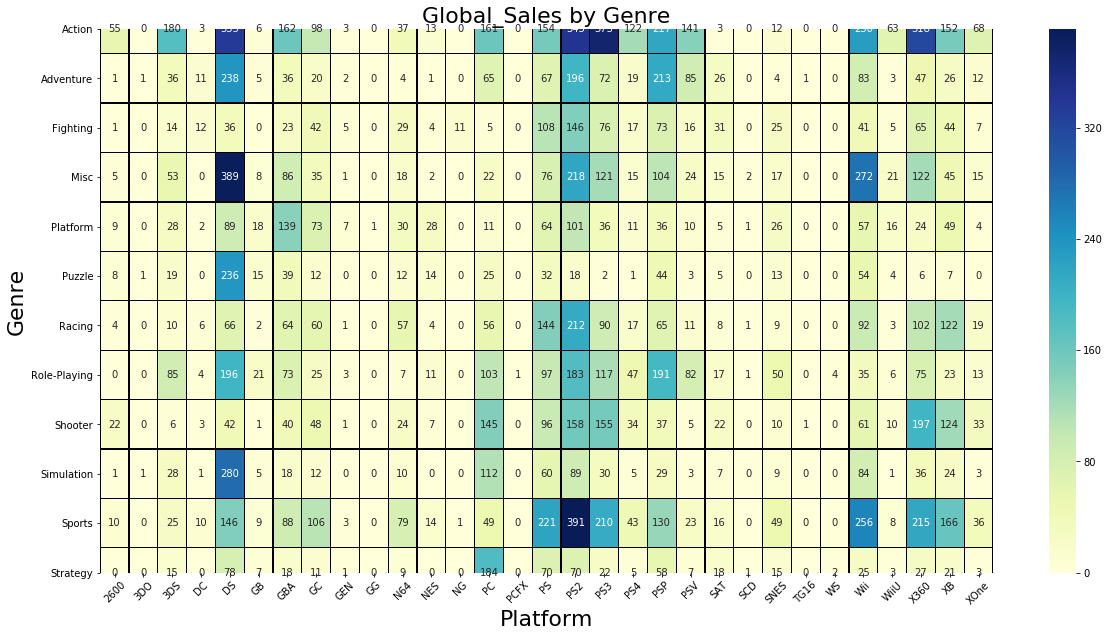

In [166]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(GenrePlatform,cmap='YlGnBu',annot=True, fmt="d",linewidth=0.2,linecolor='black')
plt.title('Global_Sales by Genre', size=22)
plt.xlabel('Platform',size=22)
plt.ylabel('Genre',size=22)
plt.xticks(rotation=45)
plt.show()